LD_LIBRARY_PATH set.
Successfully loaded COLVAR data with shape: (1000001, 3)


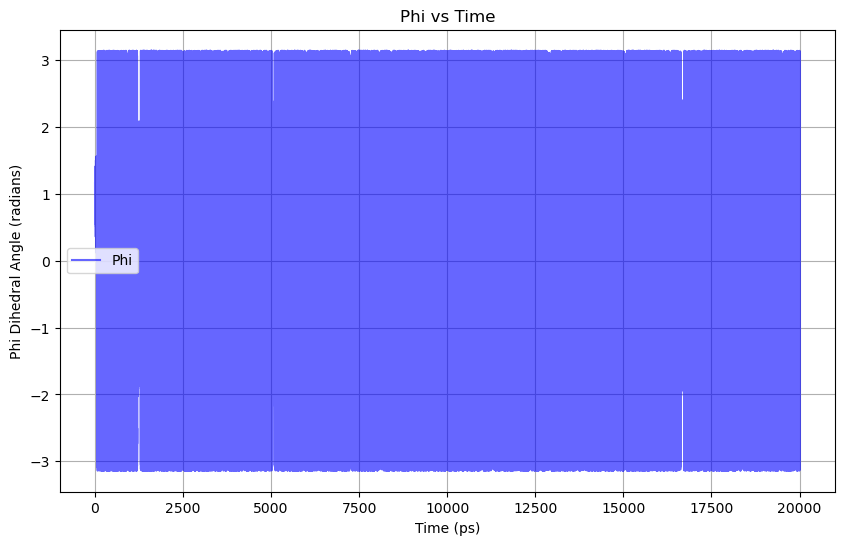

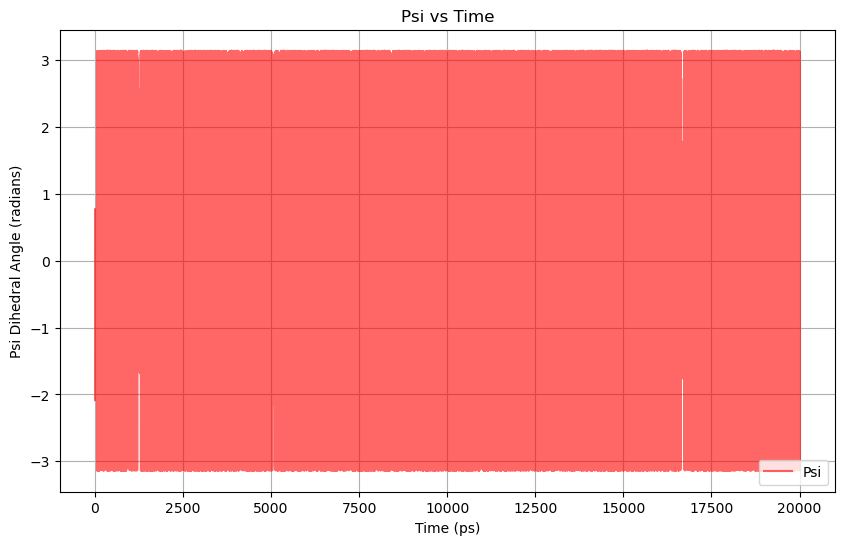

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0-dev (git: f3110b4e3) compiled on Oct 22 2020 at 15:05:46
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /scratch/work/hockygroup/software/plumed2-icc-Sept2020/lib/plumed
PLUMED: For installed feature, see /scratch/work/hockygroup/software/plumed2-icc-Sept2020/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite wh

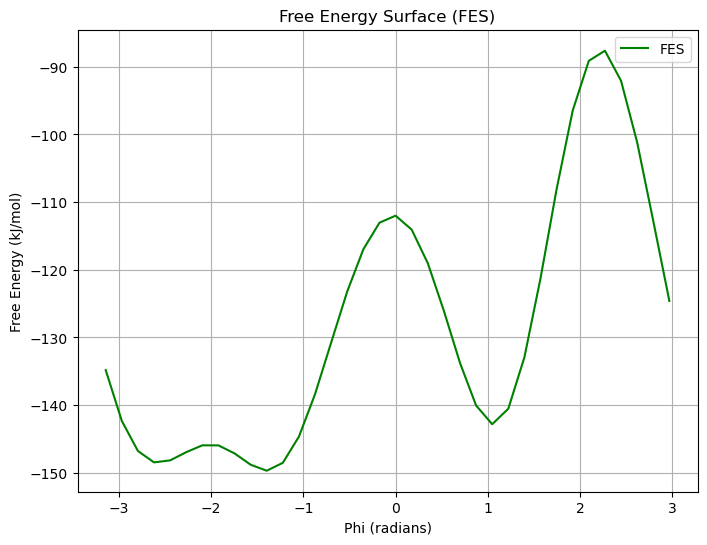

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import subprocess

# Step 1: 配置环境变量
os.environ["LD_LIBRARY_PATH"] = "/share/apps/intel/2023.1.0/compiler/2023.1.0/linux/compiler/lib/intel64_lin:/scratch/work/courses/CHEM-GA-2671-2024fa/software/plumed2-icc-Sept2020/lib:" + os.environ.get("LD_LIBRARY_PATH", "")
print("LD_LIBRARY_PATH set.")

# Step 2: 读取COLVAR文件并绘制phi和psi的时间演化图
colvar_file = 'ala2_metad_biasfactor10_pace500_height1.2_sigma0.3_10ns_B.colvar'
try:
    colvar_data = np.genfromtxt(colvar_file, comments='#', usecols=(0, 1, 2), invalid_raise=False)
    print(f"Successfully loaded COLVAR data with shape: {colvar_data.shape}")
    
    # 提取时间、phi、psi数据
    time = colvar_data[:, 0]
    phi = colvar_data[:, 1]
    psi = colvar_data[:, 2]
    
    # 绘制phi的时间演化
    plt.figure(figsize=(10, 6))
    plt.plot(time, phi, label='Phi', color='b', alpha=0.6)
    plt.title('Phi vs Time')
    plt.xlabel('Time (ps)')
    plt.ylabel('Phi Dihedral Angle (radians)')
    plt.legend()
    plt.grid(True)
    plt.savefig('phi_vs_time_B.png')
    plt.show()

    # 绘制psi的时间演化
    plt.figure(figsize=(10, 6))
    plt.plot(time, psi, label='Psi', color='r', alpha=0.6)
    plt.title('Psi vs Time')
    plt.xlabel('Time (ps)')
    plt.ylabel('Psi Dihedral Angle (radians)')
    plt.legend()
    plt.grid(True)
    plt.savefig('psi_vs_time_B.png')
    plt.show()

except FileNotFoundError:
    print(f"Error loading COLVAR data: {colvar_file} not found.")

# Step 3: 使用plumed生成fes_sampled.dat文件
fes_file = "fes_sampled.dat"
try:
    plumed_executable = "/scratch/work/courses/CHEM-GA-2671-2024fa/software/plumed2-icc-Sept2020/bin/plumed"
    subprocess.run([plumed_executable, "sum_hills", "--hills", "HILLS", "--outfile", fes_file], check=True)
    print("FES file generated successfully.")

except subprocess.CalledProcessError as e:
    print(f"Error occurred while generating FES: {e}")
except FileNotFoundError:
    print(f"Error: Plumed executable {plumed_executable} not found.")

# Step 4: 读取并绘制FES
try:
    fes_data = np.loadtxt(fes_file)
    print(f"Successfully loaded FES data from {fes_file} with shape: {fes_data.shape}")

    # 绘制FES
    plt.figure(figsize=(8, 6))
    plt.plot(fes_data[:, 0], fes_data[:, 1], label='FES', color='g')
    plt.title('Free Energy Surface (FES)')
    plt.xlabel('Phi (radians)')
    plt.ylabel('Free Energy (kJ/mol)')
    plt.legend()
    plt.grid(True)
    plt.savefig('fes_plot_B.png')
    plt.show()

except FileNotFoundError:
    print(f"Error loading or plotting FES data: {fes_file} not found.")